In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [79]:
##--Load train data and test data--
train_df = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/train_data.csv')
test_df = pd.read_csv('D:\数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/test_a.csv')

In [80]:
##--drop "city" and "ID"
train_df.drop(labels=['city','ID'],axis=1,inplace=True)
test_df.drop(labels=['city','ID'],axis=1,inplace=True)

## ---------------------------------------------Quiring the data-------------------------------------------------

In [81]:
##--Quiring the data--
train_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,68.060,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.980,47974.226,111,810967373,7755,104573.485,25,264,0,0,0.000,0,0.000,0,0.000,28248,614,111546,1124.000,284.000,0,2018/11/28,2000.000
1,125.550,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.830,40706.668,2,9668955,286,33807.535,2,4,0,0,0.000,0,0.000,0,0.000,14823,148,157552,701.000,22.000,1,2018/12/16,2000.000
2,132.000,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.300,34384.351,555,344894466,3143,109734.160,11,159,126,0,0.000,0,0.000,0,0.000,77645,520,131744,57.000,20.000,1,2018/12/22,16000.000
3,57.000,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,RG00002,BK00051,暂无信息,0,3,364,2,60,1,8,83,30,47,358,3,1,131,468272888,22809.700,20529.551,260,196307819,6418,30587.071,58,730,0,1,108037.800,1,108037.800,332760000,3080.033,8750,1665,253337,888.000,279.000,9,2018/12/21,1600.000
4,129.000,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,RG00003,BK00044,暂无信息,1,0,141,0,15,0,0,21,5,10,100,5,2,34,108851470,4463.620,24386.366,38,286722058,5608,51127.328,34,851,216,0,0.000,0,0.000,0,0.000,800,117,125309,2038.000,480.000,0,2018/11/18,2900.000
5,223.350,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,RG00002,BK00052,2003,1,22,276,2,142,12,14,118,64,95,483,23,5,154,827536466,19775.260,41847.059,276,1166702553,14161,82388.430,146,446,351,1,41130.800,0,0.000,0,0.000,48204,44561,719428,4832.000,1304.000,0,2018/11/14,14000.000
6,78.940,未知方式,2室2厅1卫,中,18,暂无数据,其他,XQ00246,RG00002,BK00051,2014,6,3,364,2,60,1,8,83,30,47,358,3,1,131,363542000,18080.570,20106.778,216,150297094,5062,29691.247,46,788,0,0,0.000,0,0.000,0,0.000,8750,1467,253337,1586.000,469.000,0,2018/11/18,1000.000
7,76.000,未知方式,2室1厅1卫,中,5,暂无数据,其他,XQ02331,RG00006,BK00031,1997,0,6,461,4,71,5,6,106,36,86,598,7,12,119,960190000,42188.640,22759.444,481,1468063801,41256,35584.250,389,643,328,0,0.000,0,0.000,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/24,1800.000
8,120.550,未知方式,3室2厅1卫,中,6,暂无数据,其他,XQ02346,RG00006,BK00031,2007,0,6,461,4,71,5,6,106,36,86,598,7,12,119,960190000,42188.640,22759.444,481,1468063801,41256,35584.250,389,643,328,0,0.000,0,0.000,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/19,1450.000
9,83.000,未知方式,3室1厅1卫,中,5,暂无数据,其他,XQ02310,RG00006,BK00031,1993,0,6,461,4,71,5,6,106,36,86,598,7,12,119,624380000,29637.500,21067.229,331,426759254,12627,33797.359,119,946,422,0,0.000,0,0.000,0,0.000,28546,0,371900,34441.000,3035.000,0,2018/4/26,1700.000


In [82]:
test_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime
0,36.540,未知方式,1室1厅1卫,高,21,西北,其他,XQ03867,RG00012,BK00013,2008,0,4,72,2,64,9,8,34,32,53,223,7,1,56,495947100,10129.390,48961.201,187,0,0,0.000,0,7,0,1,27060.240,0,0.000,0,0.000,41503,319,301635,1601.000,397.000,2,2018/10/25
1,64.000,未知方式,2室1厅1卫,高,11,南北,其他,XQ00821,RG00002,BK00055,2009,2,11,151,0,48,2,6,69,41,34,236,8,5,78,1035170000,20694.200,50022.228,252,2043938744,25573,79925.654,170,847,376,0,0.000,0,0.000,0,0.000,4370,0,306857,21123.000,3066.000,0,2018/8/19
2,98.000,未知方式,3室1厅1卫,高,6,暂无数据,精装,XQ00842,RG00002,BK00055,1996,0,11,151,0,48,2,6,69,41,34,236,8,5,78,1492450000,28948.290,51555.722,363,108869018,1528,71249.357,8,407,0,0,0.000,0,0.000,0,0.000,4370,0,306857,17471.000,2554.000,0,2018/3/4
3,43.450,未知方式,1室1厅1卫,高,6,暂无数据,其他,XQ00786,RG00002,BK00055,1994,0,11,151,0,48,2,6,69,41,34,236,8,5,78,624100000,12659.990,49297.037,162,254863219,2327,109524.374,12,415,0,0,0.000,0,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/3
4,92.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01201,RG00002,BK00062,2004,0,5,196,2,20,1,1,49,23,31,215,11,7,98,825670000,60550.850,13635.977,137,339974444,6311,53870.138,46,594,0,1,187973.550,2,237828.350,1078790000,4536.000,20904,0,245872,26189.000,2957.000,0,2018/3/14
5,82.800,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01209,RG00002,BK00062,2009,0,5,196,2,20,1,1,49,23,31,215,11,7,98,77220000,2195.180,35177.070,31,93075711,1230,75671.310,5,640,0,2,182724.800,1,132870.000,573070000,4313.010,20904,0,245872,29635.000,2662.000,0,2018/2/27
6,60.000,未知方式,1室1厅1卫,低,6,南北,其他,XQ00590,RG00002,BK00054,2012,2,6,306,1,61,2,5,94,37,50,419,14,10,126,309958000,10341.980,29970.857,129,35131972,1083,32439.494,10,297,0,0,0.000,0,0.000,0,0.000,8498,29901,428071,5543.000,1634.000,1,2018/10/12
7,76.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ00658,RG00002,BK00054,2007,0,6,306,1,61,2,5,94,37,50,419,14,10,126,540310000,16996.800,31788.925,215,75501057,1897,39800.241,6,228,0,0,0.000,0,0.000,0,0.000,8498,0,428071,26130.000,2703.000,0,2018/3/4
8,42.420,未知方式,1室1厅1卫,低,6,暂无数据,其他,XQ01155,RG00002,BK00061,1993,0,11,151,0,48,2,6,69,41,34,236,8,5,78,624100000,12659.990,49297.037,162,254863219,2327,109524.374,12,415,0,0,0.000,0,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/26
9,56.750,未知方式,1室1厅1卫,中,13,暂无数据,其他,XQ00937,RG00002,BK00056,2014,1,14,258,0,98,13,5,88,52,75,341,11,7,130,1517940000,32406.040,46841.268,425,3868064,107,36150.131,1,81,0,0,0.000,0,0.000,0,0.000,388879,0,491767,32846.000,4175.000,0,2018/8/31


In [83]:
train_df.describe()

,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41422.000,41422.000,41440.000,41440.000
mean,70.959,11.413,1.339,5.741,187.197,1.506,48.229,6.272,4.309,57.757,36.016,49.064,270.662,8.172,6.269,83.092,684691687.413,18229.687,40131.679,221.995,368400778.038,6865.194,47171.176,57.972,370.545,78.365,0.179,15037.786,0.148,12621.406,104536347.973,724.764,77250.235,1137.132,294514.059,26945.664,3089.077,0.396,8837.074
std,88.120,7.375,3.180,4.605,179.675,1.688,29.568,4.946,3.360,40.084,20.449,34.507,187.252,6.917,4.499,60.626,451691765.015,11843.927,13243.840,134.170,644570369.535,11884.242,35100.195,108.479,488.211,194.267,0.529,50239.984,0.557,49853.120,521521646.552,3224.304,132052.509,7667.382,196745.147,32174.638,2954.707,1.654,551428.659
min,1.000,0.000,0.000,0.000,24.000,0.000,9.000,0.000,0.000,8.000,1.000,7.000,10.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,600.000,0.000,49330.000,17.000,6.000,0.000,0.000
25%,42.608,6.000,0.000,2.000,74.000,0.000,24.000,2.000,1.000,33.000,25.000,24.000,154.000,4.000,3.000,46.000,393230000.000,9254.170,31147.212,127.000,6841255.000,160.000,29084.713,1.000,52.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,13983.000,0.000,165293.000,7928.000,1053.000,0.000,2800.000
50%,65.000,7.000,0.000,5.000,128.000,1.000,47.000,5.000,4.000,40.000,34.000,41.000,214.000,6.000,5.000,61.000,571866250.000,15935.910,39430.857,195.000,104277431.000,1618.000,41788.376,8.000,214.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,38947.000,0.000,245872.000,20196.000,2375.000,0.000,4000.000
75%,90.000,16.000,1.000,7.000,258.000,3.000,61.000,9.000,6.000,83.000,41.000,62.000,341.000,10.000,7.000,119.000,878170000.000,24988.510,49738.264,301.000,402935751.000,8995.000,68808.853,64.000,524.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,76668.000,0.000,330610.000,34485.000,4233.000,0.000,5500.000
max,15055.000,88.000,52.000,22.000,824.000,8.000,142.000,24.000,14.000,174.000,88.000,207.000,824.000,30.000,19.000,299.000,2402060000.000,60550.850,112471.174,675.000,4451044008.000,85922.000,299318.753,825.000,5290.000,1347.000,3.000,555508.010,5.000,555508.010,6197570000.000,37513.062,855400.000,143700.000,928198.000,621864.000,39876.000,37.000,99999999.990


一些特征存在明显的outlier,如"area"、"saleSecHouseNum"、"tradeMoney"

In [84]:
train_df.describe(include=['O'])

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,tradeTime
count,41440,41440,41440,41440,41440,41440,41440,41440,41440,41440
unique,4,104,3,10,4,4236,15,66,80,361
top,未知方式,1室1厅1卫,中,南,其他,XQ01834,RG00002,BK00031,1994,2018/3/3
freq,30759,9805,15458,34377,29040,358,11437,1958,2851,543


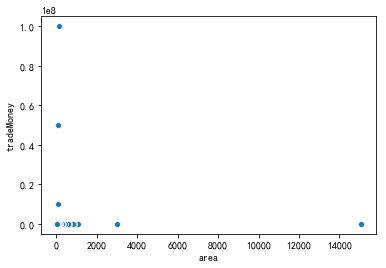

In [85]:
##--analysis "area" and "tradeMoney"
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

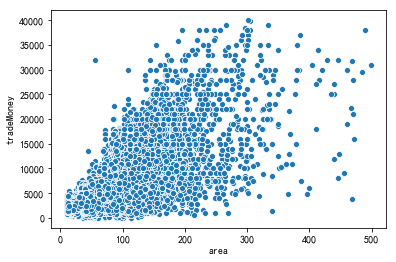

In [86]:
train_df=train_df[(train_df["area"]<500)&(train_df["area"]>10)]
train_df = train_df[train_df["tradeMoney"]<40000]
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

## -------------------The predicted variable - tradeMoney Skew & kurtosis analysis----------------

In [87]:
print("Skewness:",train_df['tradeMoney'].skew())

Skewness: 3.3888078005519695


In [88]:
print("Kurtness:",train_df["tradeMoney"].kurt())

Kurtness: 17.264997083768737


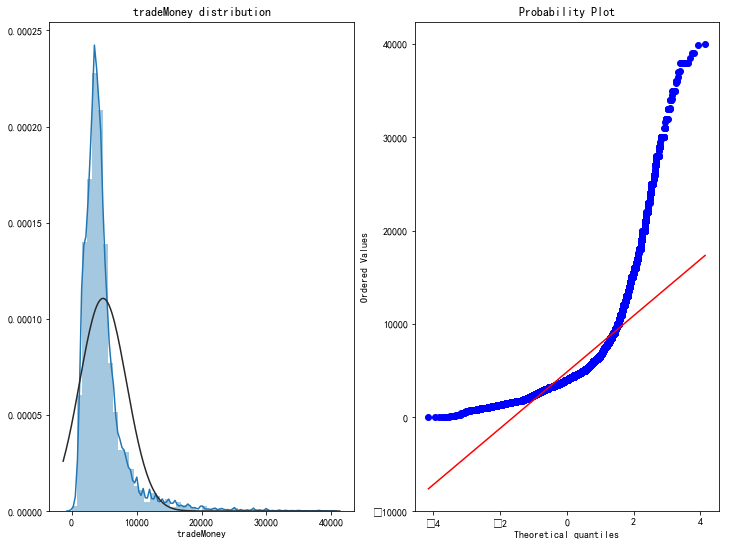

In [89]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(121)
sns.distplot(train_df["tradeMoney"],fit=norm)
plt.title('tradeMoney distribution')
ax2 = fig.add_subplot(122)
stats.probplot(train_df["tradeMoney"],plot=plt)
plt.show()

## --------------------------------------------------Missing data------------------------------------------------

In [90]:
##--locating missing data
data_feature = pd.concat((train_df,test_df)).reset_index(drop=True)
Total = data_feature.isnull().sum().sort_values(ascending=False)
Percent = Total/data_feature.isnull().count()
Missing_count = pd.concat((Total,Percent),axis=1,keys=['Total','Percent'],sort=False)
Missing_count[Missing_count.Total>0]

,Total,Percent
tradeMoney,2469,0.058
uv,20,0.000
pv,20,0.000


In [91]:
data_feature["rentType"].value_counts()

未知方式    32850
整租       5713
合租       3908
--          5
Name: rentType, dtype: int64

未知方式可以看成一个特征值

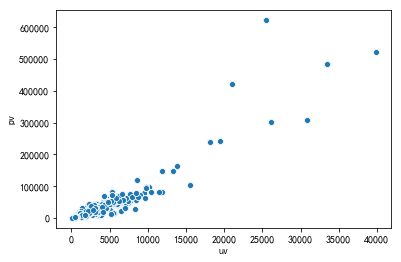

In [92]:
sns.scatterplot(x="uv",y="pv",data=data_feature)
plt.show()

这两个变量的相关性很强。

In [93]:
data_feature["uv"].fillna(data_feature["uv"].mean(),inplace=True)
data_feature["pv"].fillna(data_feature["pv"].mean(),inplace=True)
data_feature["pv"]=data_feature["pv"].astype(int)
data_feature["uv"]=data_feature["uv"].astype(int)

## -------------------------------------------Outlier Values------------------------------------------------

In [94]:
##--split the data set into numerical data and categorial--
categorial_feature=data_feature.select_dtypes(include=["object"]).columns
categorial_feature

Index(['buildYear', 'communityName', 'houseDecoration', 'houseFloor',
       'houseToward', 'houseType', 'plate', 'region', 'rentType', 'tradeTime'],
      dtype='object')

In [95]:
numerical_feature=data_feature.select_dtypes(exclude=["object"]).columns
numerical_feature

Index(['area', 'bankNum', 'busStationNum', 'drugStoreNum', 'gymNum',
       'hospitalNum', 'interSchoolNum', 'landMeanPrice', 'landTotalPrice',
       'lookNum', 'mallNum', 'newWorkers', 'parkNum', 'privateSchoolNum', 'pv',
       'remainNewNum', 'residentPopulation', 'saleSecHouseNum', 'schoolNum',
       'shopNum', 'subwayStationNum', 'superMarketNum', 'supplyLandArea',
       'supplyLandNum', 'supplyNewNum', 'totalFloor', 'totalNewTradeArea',
       'totalNewTradeMoney', 'totalTradeArea', 'totalTradeMoney',
       'totalWorkers', 'tradeLandArea', 'tradeLandNum', 'tradeMeanPrice',
       'tradeMoney', 'tradeNewMeanPrice', 'tradeNewNum', 'tradeSecNum', 'uv'],
      dtype='object')

In [96]:
## check categorial

data_feature["tradMonth"] = data_feature["tradeTime"].apply(lambda x:x.split("/")[1])
data_feature.drop("tradeTime",axis=1,inplace=True)

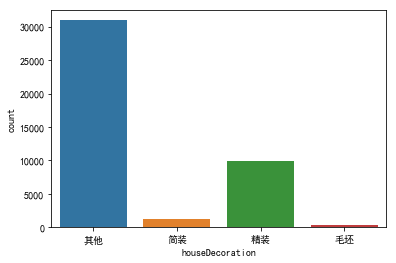

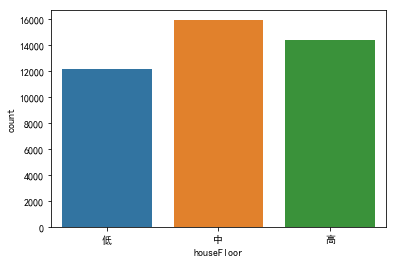

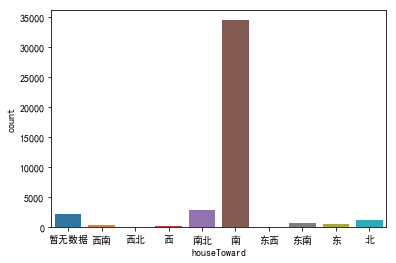

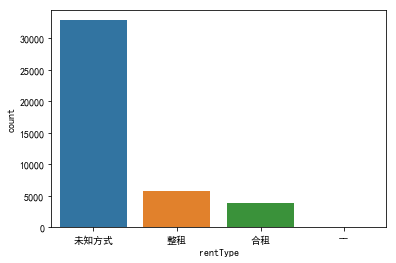

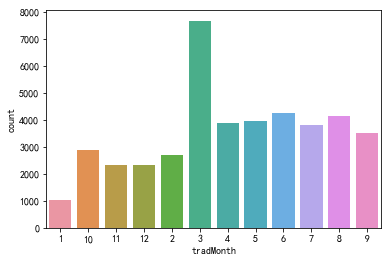

In [97]:
## plot
plt.rcParams['font.sans-serif']=['simhei']
columns_1=["houseDecoration","houseFloor","houseToward","rentType","tradMonth"];columns_2=["communityName","plate","region"]
for i in columns_1:
    sns.countplot(x=i,data=data_feature)
    plt.show()

In [98]:
data_feature["rentType"].value_counts()

未知方式    32850
整租       5713
合租       3908
--          5
Name: rentType, dtype: int64

出现了一个奇怪的值 "一"，把它归为位置方式

In [99]:
#data_feature=data_feature[data_feature["rentType"]!="--"]
data_feature["rentType"][data_feature["rentType"]=="--"]="未知方式"

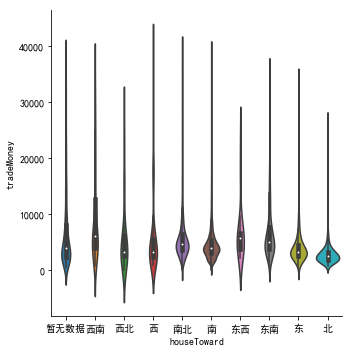

In [100]:
sns.catplot(x="houseToward",y="tradeMoney",data=data_feature,kind="violin")
plt.show()

"暂无数据"应该为"东北"，不过不改也没有影响

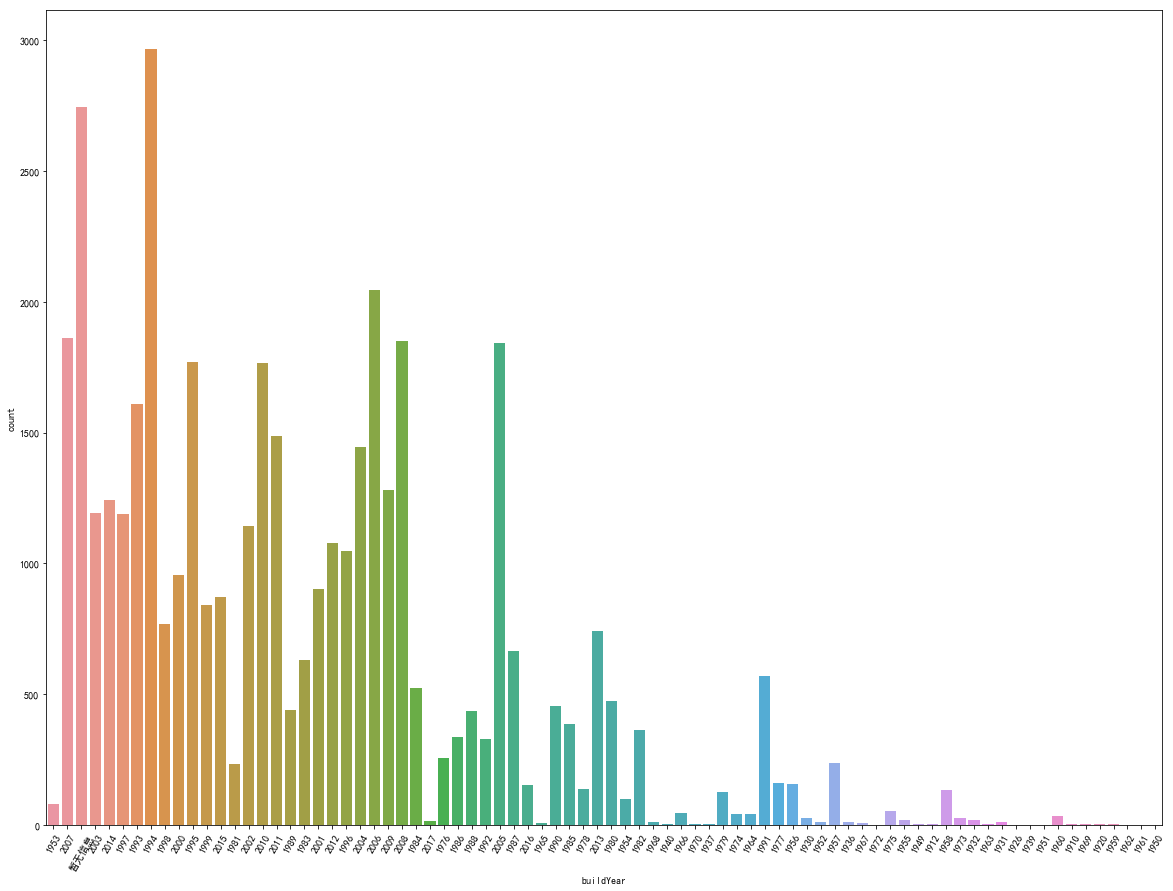

In [101]:
# "buildYear"
fig,ax=plt.subplots(figsize=(20,15))
sns.countplot(x="buildYear",data=data_feature,ax=ax)
plt.xticks(rotation=60)
plt.show()

有一列"暂无数据"需要填充

In [126]:
# The same communityName has same buildYear
# inter=data_feature.groupby("communityName")
# for name,group in inter["buildYear"]:
#     print(name)
#     print(group)
        

结果发现，缺失值是一个小区一个小区的缺，所以想做的话，只能把一个小区的"buildYear"设为一样。先不处理~

In [103]:
data_feature['buildYear'] = np.where(data_feature['buildYear'] == '暂无信息', 2019, data_feature['buildYear'])
data_feature['buildYear'] = data_feature['buildYear'].astype(int)
data_feature['buildYear'] = 2019-data_feature['buildYear']

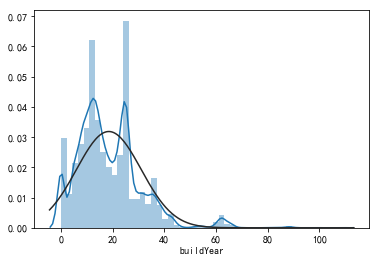

In [104]:
#transfrom buildYear to numerical feature
sns.distplot(data_feature["buildYear"],fit=norm)
plt.show()

In [105]:
print("buildYear before transform:")
print(data_feature["buildYear"].skew())
print(data_feature["buildYear"].kurt())

buildYear before transform:
1.353824299374159
3.833936980448427


In [106]:
lm=0.15
data_feature["buildYear"]=boxcox1p(data_feature["buildYear"],lm)

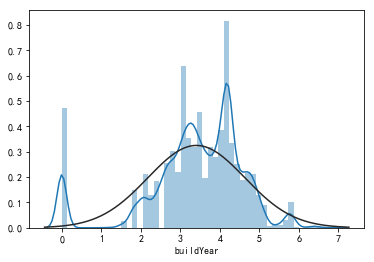

In [107]:
sns.distplot(data_feature["buildYear"],fit=norm)
plt.show()

In [108]:
print("buildYear after transform:")
print(data_feature["buildYear"].skew())
print(data_feature["buildYear"].kurt())

buildYear after transform:
-1.0878016290029313
1.5833315899968214


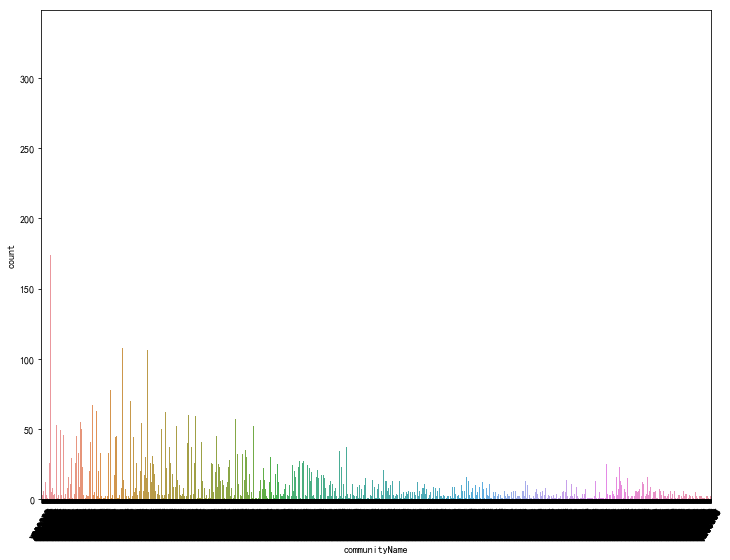

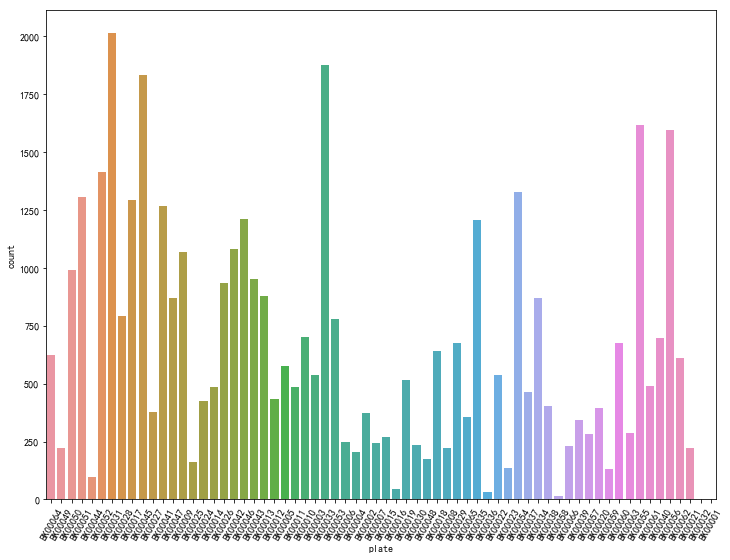

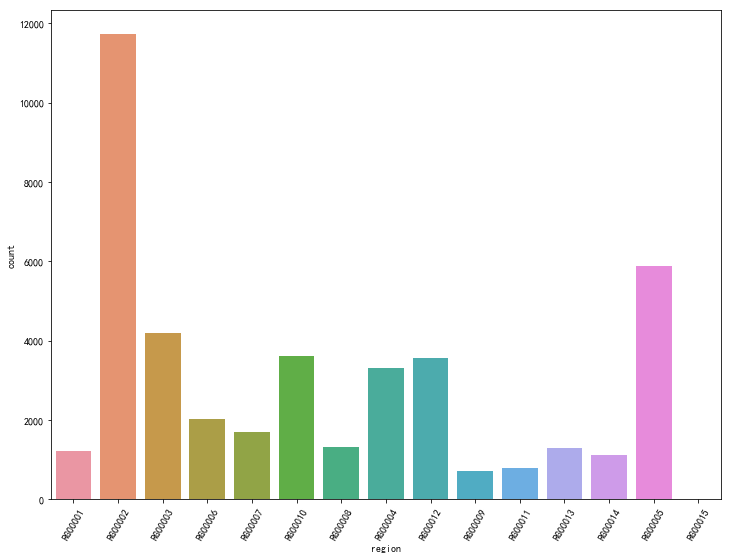

In [109]:
for j in columns_2:
    fig,ax=plt.subplots(figsize=(12,9))
    sns.countplot(x=j,data=data_feature,ax=ax)
    plt.xticks(rotation=60)
    plt.show()

从图形上看，communityName特征太多，区分度不高，后期看一下怎么处理,这里先直接删掉

In [110]:
data_feature.drop("communityName",axis=1,inplace=True)
def parseRoom(info, index):
    res = int(info[index*2])
    return res
data_feature.insert(3,'室',None)
data_feature.insert(4, '厅', None)
data_feature.insert(5, '卫', None)
data_feature['室'] = data_feature['houseType'].apply(parseRoom, index=0)
data_feature['厅'] = data_feature['houseType'].apply(parseRoom, index=1)
data_feature['卫'] = data_feature['houseType'].apply(parseRoom, index=2)
data_feature.drop("houseType",axis=1,inplace=True)


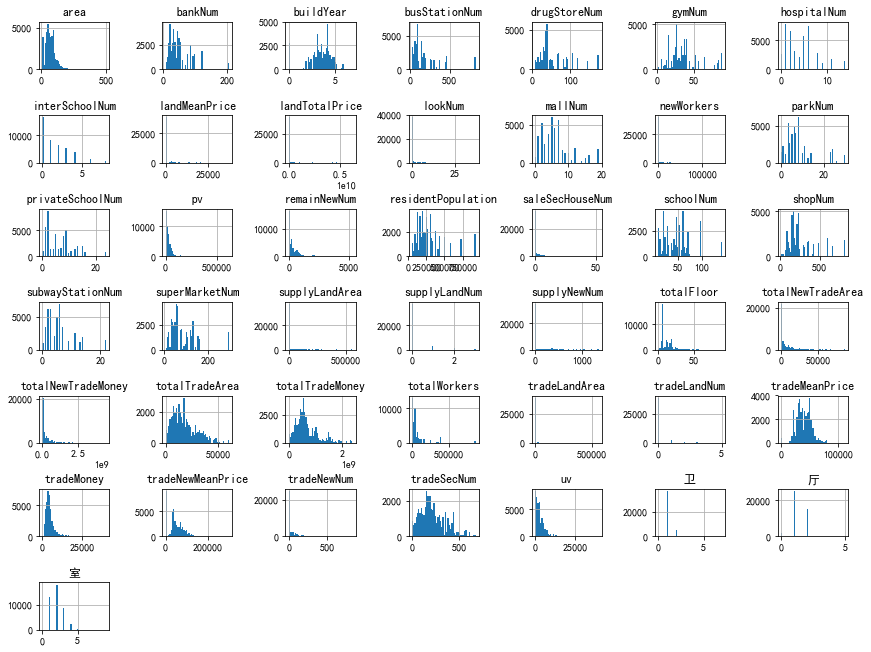

In [111]:
## check numerical feature

data_feature.hist(bins=50,figsize=(12,9))
plt.tight_layout(pad=0.5)
plt.show()

In [112]:
data_feature.head(20)

,area,bankNum,buildYear,室,厅,卫,busStationNum,drugStoreNum,gymNum,hospitalNum,houseDecoration,houseFloor,houseToward,interSchoolNum,landMeanPrice,landTotalPrice,lookNum,mallNum,newWorkers,parkNum,plate,privateSchoolNum,pv,region,remainNewNum,rentType,residentPopulation,saleSecHouseNum,schoolNum,shopNum,subwayStationNum,superMarketNum,supplyLandArea,supplyLandNum,supplyNewNum,totalFloor,totalNewTradeArea,totalNewTradeMoney,totalTradeArea,totalTradeMoney,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,uv,tradMonth
0,68.060,16,5.860,2,1,1,36,12,15,1,其他,低,暂无数据,0,0.000,0,0,3,614,5,BK00064,1,1124,RG00001,264,未知方式,111546,0,28,76,7,22,0.000,0,0,16,7755,810967373,7411.980,355584000,28248,0.000,0,47974.226,2000.000,104573.485,25,111,284,11
1,125.550,16,3.128,3,2,2,184,27,5,1,简装,中,暂无数据,0,0.000,0,1,4,148,6,BK00049,0,701,RG00002,4,未知方式,157552,0,26,163,2,51,0.000,0,0,14,286,9668955,122.830,5000000,14823,0.000,0,40706.668,2000.000,33807.535,2,2,22,12
2,132.000,37,0.000,3,2,2,60,24,35,3,其他,低,暂无数据,1,0.000,0,1,4,520,6,BK00050,2,57,RG00002,159,未知方式,131744,3,43,85,6,30,0.000,0,126,32,3143,344894466,49071.300,1687284798,77645,0.000,0,34384.351,16000.000,109734.160,11,555,20,12
3,57.000,47,0.000,1,1,1,364,83,30,8,精装,中,暂无数据,2,3080.033,332760000,9,1,1665,3,BK00051,1,888,RG00002,730,未知方式,253337,0,60,358,3,131,108037.800,1,0,17,6418,196307819,22809.700,468272888,8750,108037.800,1,20529.551,1600.000,30587.071,58,260,279,12
4,129.000,10,0.000,3,2,3,141,21,5,0,毛坯,低,暂无数据,0,0.000,0,0,2,117,5,BK00044,0,2038,RG00003,851,未知方式,125309,1,15,100,0,34,0.000,0,216,2,5608,286722058,4463.620,108851470,800,0.000,0,24386.366,2900.000,51127.328,34,38,480,11
5,223.350,95,3.530,4,3,3,276,118,64,14,其他,低,暂无数据,2,0.000,0,0,5,44561,23,BK00052,12,4832,RG00002,446,未知方式,719428,1,142,483,22,154,41130.800,1,351,2,14161,1166702553,19775.260,827536466,48204,0.000,0,41847.059,14000.000,82388.430,146,276,1304,11
6,78.940,47,2.056,2,2,1,364,83,30,8,其他,中,暂无数据,2,0.000,0,0,1,1467,3,BK00051,1,1586,RG00002,788,未知方式,253337,6,60,358,3,131,0.000,0,0,18,5062,150297094,18080.570,363542000,8750,0.000,0,20106.778,1000.000,29691.247,46,216,469,11
7,76.000,86,4.003,2,1,1,461,106,36,6,其他,中,暂无数据,4,0.000,0,0,12,0,7,BK00031,5,40787,RG00006,643,未知方式,371900,0,71,598,6,119,0.000,0,328,5,41256,1468063801,42188.640,960190000,28546,0.000,0,22759.444,1800.000,35584.250,389,481,2942,3
8,120.550,86,3.128,3,2,1,461,106,36,6,其他,中,暂无数据,4,0.000,0,0,12,0,7,BK00031,5,40787,RG00006,643,未知方式,371900,0,71,598,6,119,0.000,0,328,6,41256,1468063801,42188.640,960190000,28546,0.000,0,22759.444,1450.000,35584.250,389,481,2942,3
9,83.000,86,4.263,3,1,1,461,106,36,6,其他,中,暂无数据,4,0.000,0,0,12,0,7,BK00031,5,34441,RG00006,946,未知方式,371900,0,71,598,6,119,0.000,0,422,5,12627,426759254,29637.500,624380000,28546,0.000,0,21067.229,1700.000,33797.359,119,331,3035,4


In [113]:
## OneHotEnconder
data_feature.drop(labels="tradeMoney",axis=1,inplace=True)
final_feature=pd.get_dummies(data_feature)
final_feature.shape
final_feature.head(10)

,area,bankNum,buildYear,室,厅,卫,busStationNum,drugStoreNum,gymNum,hospitalNum,interSchoolNum,landMeanPrice,landTotalPrice,lookNum,mallNum,newWorkers,parkNum,privateSchoolNum,pv,remainNewNum,residentPopulation,saleSecHouseNum,schoolNum,shopNum,subwayStationNum,superMarketNum,supplyLandArea,supplyLandNum,supplyNewNum,totalFloor,totalNewTradeArea,totalNewTradeMoney,totalTradeArea,totalTradeMoney,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeNewMeanPrice,tradeNewNum,tradeSecNum,uv,houseDecoration_其他,houseDecoration_毛坯,houseDecoration_简装,houseDecoration_精装,houseFloor_中,houseFloor_低,houseFloor_高,houseToward_东,houseToward_东南,houseToward_东西,houseToward_北,houseToward_南,houseToward_南北,houseToward_暂无数据,houseToward_西,houseToward_西北,houseToward_西南,plate_BK00001,plate_BK00002,plate_BK00003,plate_BK00004,plate_BK00005,plate_BK00006,plate_BK00007,plate_BK00008,plate_BK00009,plate_BK00010,plate_BK00011,plate_BK00012,plate_BK00013,plate_BK00014,plate_BK00015,plate_BK00016,plate_BK00017,plate_BK00018,plate_BK00019,plate_BK00020,plate_BK00021,plate_BK00022,plate_BK00023,plate_BK00024,plate_BK00025,plate_BK00026,plate_BK00027,plate_BK00028,plate_BK00029,plate_BK00030,plate_BK00031,plate_BK00032,plate_BK00033,plate_BK00034,plate_BK00035,plate_BK00036,plate_BK00037,plate_BK00038,plate_BK00039,plate_BK00040,plate_BK00041,plate_BK00042,plate_BK00043,plate_BK00044,plate_BK00045,plate_BK00046,plate_BK00047,plate_BK00048,plate_BK00049,plate_BK00050,plate_BK00051,plate_BK00052,plate_BK00053,plate_BK00054,plate_BK00055,plate_BK00056,plate_BK00057,plate_BK00058,plate_BK00059,plate_BK00060,plate_BK00061,plate_BK00062,plate_BK00063,plate_BK00064,plate_BK00065,plate_BK00066,region_RG00001,region_RG00002,region_RG00003,region_RG00004,region_RG00005,region_RG00006,region_RG00007,region_RG00008,region_RG00009,region_RG00010,region_RG00011,region_RG00012,region_RG00013,region_RG00014,region_RG00015,rentType_合租,rentType_整租,rentType_未知方式,tradMonth_1,tradMonth_10,tradMonth_11,tradMonth_12,tradMonth_2,tradMonth_3,tradMonth_4,tradMonth_5,tradMonth_6,tradMonth_7,tradMonth_8,tradMonth_9
0,68.060,16,5.860,2,1,1,36,12,15,1,0,0.000,0,0,3,614,5,1,1124,264,111546,0,28,76,7,22,0.000,0,0,16,7755,810967373,7411.980,355584000,28248,0.000,0,47974.226,104573.485,25,111,284,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,125.550,16,3.128,3,2,2,184,27,5,1,0,0.000,0,1,4,148,6,0,701,4,157552,0,26,163,2,51,0.000,0,0,14,286,9668955,122.830,5000000,14823,0.000,0,40706.668,33807.535,2,2,22,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,132.000,37,0.000,3,2,2,60,24,35,3,1,0.000,0,1,4,520,6,2,57,159,131744,3,43,85,6,30,0.000,0,126,32,3143,344894466,49071.300,1687284798,77645,0.000,0,34384.351,109734.160,11,555,20,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,57.000,47,0.000,1,1,1,364,83,30,8,2,3080.033,332760000,9,1,1665,3,1,888,730,253337,0,60,358,3,131,108037.800,1,0,17,6418,196307819,22809.700,468272888,8750,108037.800,1,20529.551,30587.071,58,260,279,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,129.000,10,0.000,3,2,3,141,21,5,0,0,0.000,0,0,2,117,5,0,2038,851,125309,1,15,100,0,34,0.000,0,216,2,5608,286722058,4463.620,108851470,800,0.000,0,24386.366,51127.328,34,38,480,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [114]:
X_train=final_feature.iloc[:len(train_df["tradeMoney"]),:]
Y_train=train_df["tradeMoney"]
X_test=final_feature.iloc[len(train_df["tradeMoney"]):,:]
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (40007, 155)
Y_train shape: (40007,)
X_test shape: (2469, 155)


## -------------------------------------------------------Creating Model------------------------------------------------- 
### Key features of the model training process
#### Cross Validation:using 10-fold cross validation
#### On each run of cross validation fit 7models(ridge,svr,gradient boosting,random forest,xgboost,lightgbm regressor)
#### Stacking: trained a meta StackingCVRegressor optimized using xgboost
#### Blending:All model trained will overfit the training data to varying degrees.Therefore,blended all models to make final predition

In [115]:
#import libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

In [116]:
#defining folds and score function
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
def cv_rmse(model):
    rmse=np.sqrt(-cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv=kfolds))
    return rmse
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [117]:
#defining models
#light gredient boosting Regressor
lightgbm=LGBMRegressor(object="regression",
                      num_leaves=31,
                      learning_rate=0.01,
                      n_estimators=500,
                      max_bin=200,
                      bagging_fraction=0.8,
                      bagging_freq=1,
                      bagging_seed=23,
                      feature_fraction=0.8,
                      feature_fraction_seed=8,
                      min_sum_hessian_in_leaf = 11,
                      verbose=-1,
                      random_state=42)
#XGBoost Regressor
xgboost=XGBRegressor(learning_rate=0.1,
                    n_estimators=800,
                    max_depth=4,
                    min_child_weight=0,
                    gamma=0.6,
                    subsample=0.7,
                    colsample_bytree=0.7,
                    objective='reg:squarederror',
                    nthread=-1,
                    scale_pos_weight=1,
                    seed=27,
                    reg_alpha=0.00006,
                    random_state=42)
#Ridge Regressor
ridge_alphas=[1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50,]
ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=ridge_alphas, cv=kfolds))
#Support Vector Regressor
svr=make_pipeline(RobustScaler(),SVR(C= 20, epsilon= 0.008, gamma=0.0003))
#gredient boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)


In [118]:
##Train models
# get cross validation score for each model
scores={}
score=cv_rmse(lightgbm)
print("lightgbm\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
scores["lightgbm"]=((score.mean()),(score.std()))

lightgbm
 mean:1310.133  std:44.320


In [119]:
# score=cv_rmse(xgboost)
# print("xgboost\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
# scores["xgboost"]=(score.mean(),score.std())

In [120]:
# score=cv_rmse(ridge)
# print("ridge\n mean:{:.3f}  std:{:3f}".format(score.mean(),score.std()))
# scores["ridge"]=(score.mean(),score.mean())

In [121]:
# score=cv_rmse(svr)
# print("svr\n mean:{:.3f}  std:{:3.f}".format(score.mean(),score.std()))
# scores["svr"]=(score.mean(),score.std())

In [122]:
# score=cv_rmse(gbr)
# print("gbr\n mean:{:.3f} std:{:.3f}".format(score.mean(),score.std()))
# scores["gbr"]=(score.mean(),score.std())

In [123]:
score=cv_rmse(lightgbm)
print("rf\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
scores["rf"]=(score.mean(),score.std())

rf
 mean:1310.133  std:44.320


In [124]:
#Fit the model
elf=lightgbm.fit(X_train,Y_train)
pre = elf.predict(X_test)
pre

array([3906.30998966, 5457.59184901, 6264.58848247, ..., 4658.84753164,
       5996.83661516, 4013.06716775])

In [125]:
## predice score
from sklearn.metrics import r2_score
def online_score(pred):
    print("预测结果最大值：{}，预测结果最小值：{}".format(pred.max(),pred.min()))
    # a榜上分
    combine1 = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/sub_a_913.csv',engine = "python",header=None)
    score1 = r2_score(pred,combine1)
    print("score1:{}".format(score1))
    # # b榜上分
    # combine2 = pd.read_csv('sub_b_9194.csv')
    # score2 = r2_score(pred,combine2)
    # print("对比919分数：{}".format(score2))
scores=online_score(pre)
scores

预测结果最大值：18791.469651180647，预测结果最小值：1533.7254804634495
score1:0.9183524009730633
